In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random as rd

In [2]:
dataset=pd.read_csv(r'F:\MS IIITH\course structure and syllabus\Semester I\Data Analytics\Project\reformed_datset.csv')


In [3]:
# let us begin with implementing k means for value and wage
dataset_considered=pd.DataFrame()
dataset_considered['Value']=dataset['Value']
dataset_considered['Wage']=dataset['Wage']

In [4]:
K=7# value of specified 

In [5]:
n_iter=30# It defines the total no. of itterations for convergence

In [6]:
m=dataset_considered.shape[0] #number of training examples
n=dataset_considered.shape[1] #number of features. Here n=2

In [7]:
#initialize centroids randomly from data points
Centroids = pd.DataFrame(index=range(n),columns=range(10))

In [8]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids[i][0]=dataset_considered['Value'][rand]
    Centroids[i][1]=dataset_considered['Wage'][rand]

In [9]:
output= pd.DataFrame(index=range(len(dataset_considered)),columns=range(K))

In [10]:
def euclidean_distance():
    #print("within elcid dist calculation ")
    # finding Euclidean distance between each point to all the centroids
    p=[0,0]
    q=[0,0]
    for i  in range(len(dataset_considered)):
        for j in range(K):
            #print(i)
            #print(j)
            #print("----------")
            p[0]=Centroids[j][0]
            p[1]=Centroids[j][1]
            q[0]=dataset_considered['Value'][i]
            q[1]=dataset_considered['Wage'][i]
            output[j][i]=math.dist(p,q)



In [11]:
# creating an empty list to store the clusters where the points need to be fit
#cluster_seg=[None]*len(output)

In [12]:
def cluster_labels():
    #print("within cluster label generation")
    # updating the cluster labels for points 
    for i in range(1,len(cluster_seg)+1):
        valset=output.iloc[i-1].to_list()
        cluster_seg[i-1]=valset.index(np.min(valset))


In [13]:
val_checker=pd.DataFrame(index=range(n+1),columns=range(K))

In [14]:
counter_value=np.zeros(K)

In [15]:
def centroid_updation(K):
    #print("within centroid updation")
    sum_value=np.zeros(K)
    wage_value=np.zeros(K)
    counter_value=np.zeros(K)


    #updating the centroid value as per the points in the cluster
    for i in range(len(cluster_seg)):
        for j in range(K):  
            if cluster_seg[i]==j :
                sum_value[j]=sum_value[j]+dataset_considered['Value'][i]
                wage_value[j]=wage_value[j]+dataset_considered['Wage'][i]
                counter_value[j]=counter_value[j]+1


    for i in range(K):  
        for j in range(len(Centroids)):
                if j==0:
                    Centroids[i][j]=(sum_value[i]/counter_value[i]) #value for cluster in centroid
                else:
                    Centroids[i][j]=(wage_value[i]/counter_value[i])#wage for cluster 1 in centroid




In [16]:
#def k_means(K):
#print("within kmeans calculation")
for i in range(n_iter):
    #print("itteration in k means")
    #print(i)
    #print("calling euclidean_distance")
    euclidean_distance()
    #creating an empty list to store the clusters where the points need to be fit
    cluster_seg=[None]*len(output)
    cluster_labels()
    centroid_updation(K)


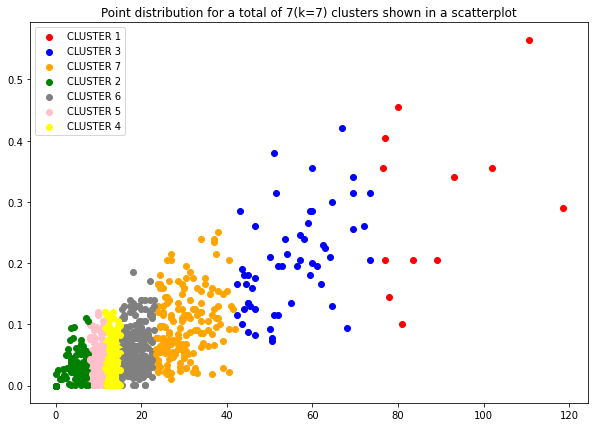

In [17]:
plt.figure(figsize=(10, 7))  
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
for j in range(len(cluster_seg)):
  if cluster_seg[j]==0:
    if c1==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Red', label="CLUSTER 1") 
      c1=c1+1
    else:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Red') 

  if cluster_seg[j]==1:
    if c2==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Green' , label="CLUSTER 2") 
      c2=c2+1
    else:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Green') 

  if cluster_seg[j]==2:
    if c3==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Blue' , label="CLUSTER 3")
      c3=c3+1
    else:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Blue')

  if cluster_seg[j]==3:
    if c4==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Yellow' , label="CLUSTER 4")
      c4=c4+1
    else:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Yellow') 

  if cluster_seg[j]==4:
    if c5==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Pink' , label="CLUSTER 5") 
      c5=c5+1
    else:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j] ,c='Pink' ) 
    
  if cluster_seg[j]==5:
    if c6==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j],c='Grey',  label="CLUSTER 6") 
      c6=c6+1
    else:
       plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j],c='Grey') 
    
  if cluster_seg[j]==6:
    if c7==0:
      plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j],c='Orange',  label="CLUSTER 7") 
      c7=c7+1
    else:
       plt.scatter(dataset_considered['Value'][j], dataset_considered['Wage'][j],c='Orange') 
  
    

plt.title("Point distribution for a total of 7(k=7) clusters shown in a scatterplot")  
plt.legend()
plt.show()